In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/marcos/miniconda3/envs/aedii_t4/lib/python3.12/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
g = nx.read_graphml("fused_graph_truncated.graphml")

In [3]:
#youll need to export the gephi layout you want — 
#i've chosen force atlas 2 as it was way better than nx's spring layout here
df = pd.read_csv("Posicoes.csv")

In [4]:
df

,Id,X,Y
0,List Of United States Senators From Pennsylvania,-1701.581421,-8551.308594
1,Town Twinning,-3720.077148,-7468.017578
2,Lechon Sauce,2055.152588,-193.800858
3,Vin Jaune,-4713.083984,-4083.434082
4,Guk,3290.505371,309.887207
...,...,...,...
32573,"Farrell, Pennsylvania",-1942.637939,-8909.925781
32574,Nuclear Power,392.523315,-6461.770508
32575,List Of World Heritage Sites In Brazil,2256.169189,-7189.152344
32576,Public Holidays In The United States,-876.791931,-6533.720703


In [5]:
posGephi = {row['Id']: np.array((row['X'],row['Y'])) for _, row in df.iterrows()}

In [6]:
metrics = {
    'degree': list(dict(nx.degree_centrality(g)).values()),
    'eigen': list(dict(nx.eigenvector_centrality(g)).values()),
    'close': list(dict(nx.closeness_centrality(g)).values()),
    'between': list(dict(nx.betweenness_centrality(g)).values()),
}
maxes={}
mins={}
for metric, data in metrics.items():
    tempMin=data[0]
    tempMax=data[0]
    for i in data[1:]:
        if i > tempMax: tempMax=i; continue
        if i < tempMin: tempMin=i
    maxes[metric]=tempMax
    mins[metric]=tempMin

max_centrality = max(maxes.values())

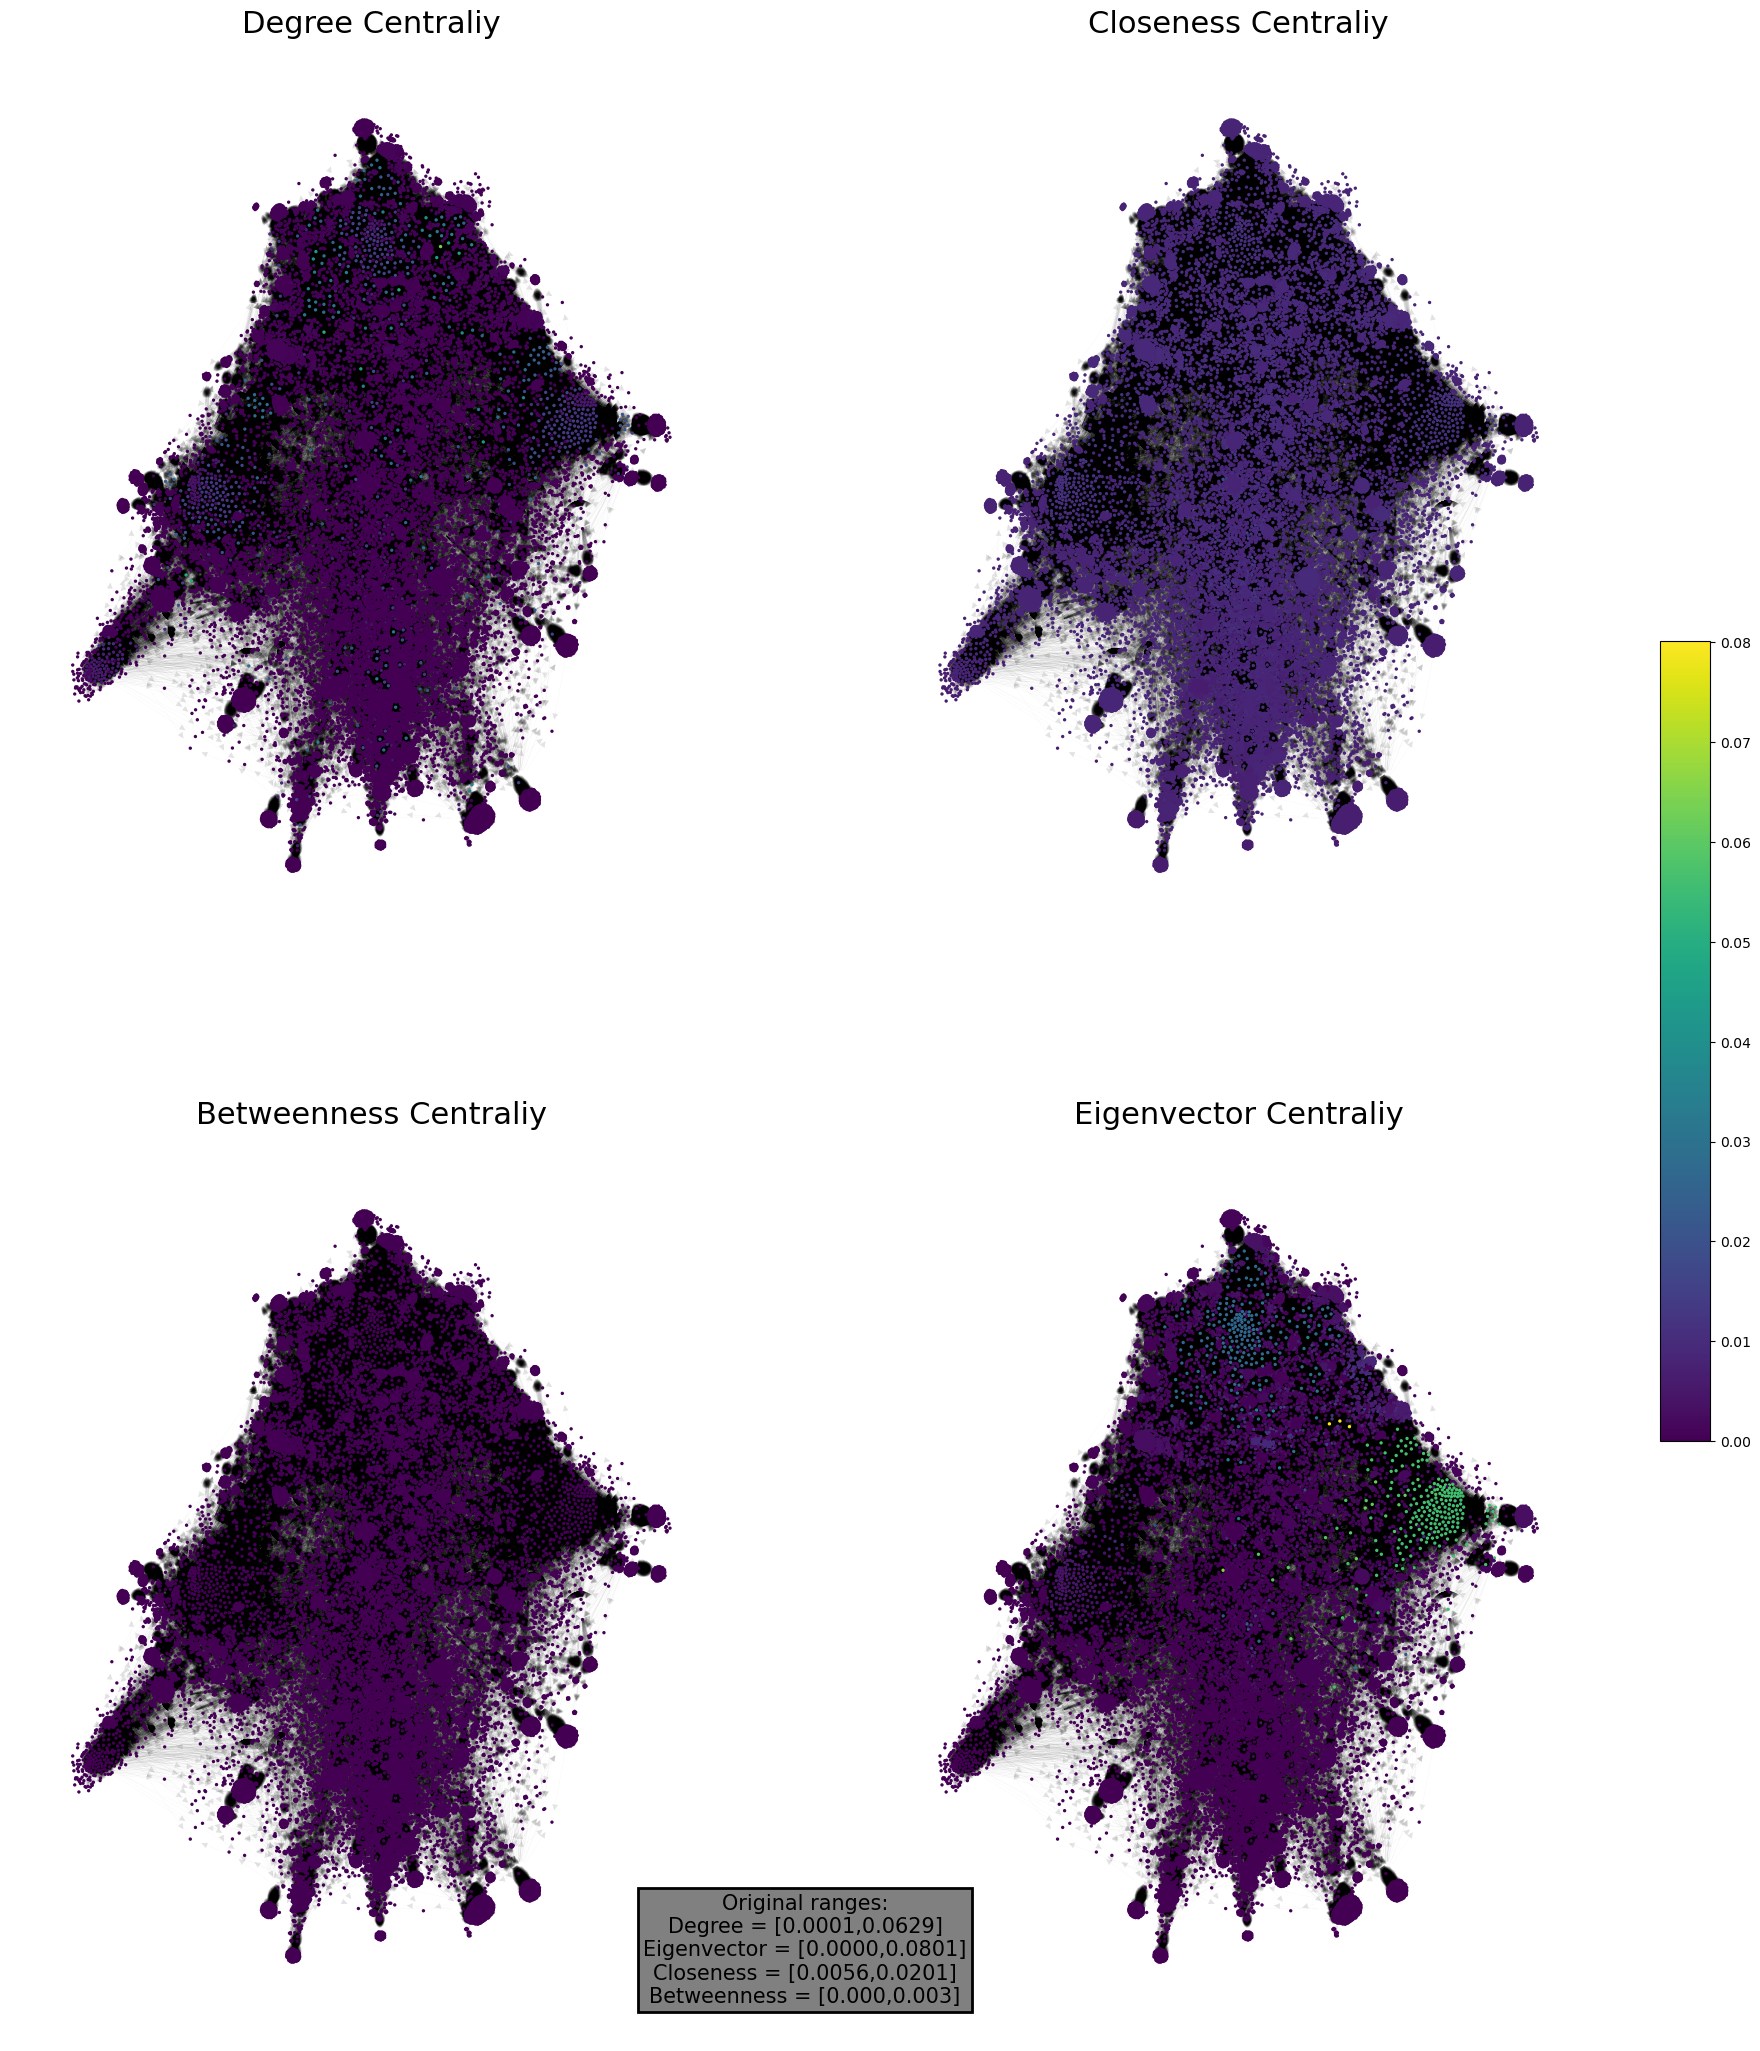

In [7]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# color of nodes
color_degree = metrics['degree']
color_closeness = metrics['close']
color_betweenness = metrics['between']
color_eigenvector = metrics['eigen']

edges_config={
    'G':g,
    'pos':posGephi,
    'width':0.1,
    'alpha':0.1,
}

nodes_config={
    'G':g,
    'pos':posGephi,
    'node_size':2,
    'cmap':plt.cm.viridis,
    'vmin':0,
    'vmax':max_centrality,
}

title_size = 22

for axe in ax.flat:
    nx.draw_networkx_edges(**edges_config, ax=axe)

# draw nodes
nodes = nx.draw_networkx_nodes(**nodes_config,
                 node_color=color_degree,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(**nodes_config,
                 node_color=color_closeness,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(**nodes_config,
                 node_color=color_betweenness,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(**nodes_config,
                 node_color=color_eigenvector,
                 ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy", size=title_size)
ax[0,1].set_title("Closeness Centraliy", size=title_size)
ax[1,0].set_title("Betweenness Centraliy", size=title_size)
ax[1,1].set_title("Eigenvector Centraliy", size=title_size)


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)


desc=f"Original ranges:\nDegree = [{mins['degree']:.4f},{maxes['degree']:.4f}]\nEigenvector = [{mins['eigen']:.4f},{maxes['eigen']:.4f}]\nCloseness = [{mins['close']:.4f},{maxes['close']:.4f}]\nBetweenness = [{mins['between']:.3f},{maxes['between']:.3f}]"
t = ax[1,1].text(-0.1, 0.1, desc,
            ha="center", va="center", size=15,
            bbox=dict(fc="gray", ec="black", lw=2),transform=ax[1,1].transAxes)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [9]:
#g_unfiltered=nx.read_graphml("backup/fused_graph.graphml")

In [10]:
in_degrees = [val for _, val in g.in_degree()]
#following line for analysis of the non-truncated version
#in_degrees = [val for _, val in g.in_degree()]
histogram = {}
for val in in_degrees:
    histogram[val] = histogram.get(val, 0)+1
bins = [x for x in range(min(histogram.keys()), max(histogram.keys())+1)]
counts = []
for i in bins:
    counts.append(histogram.get(i, 0))

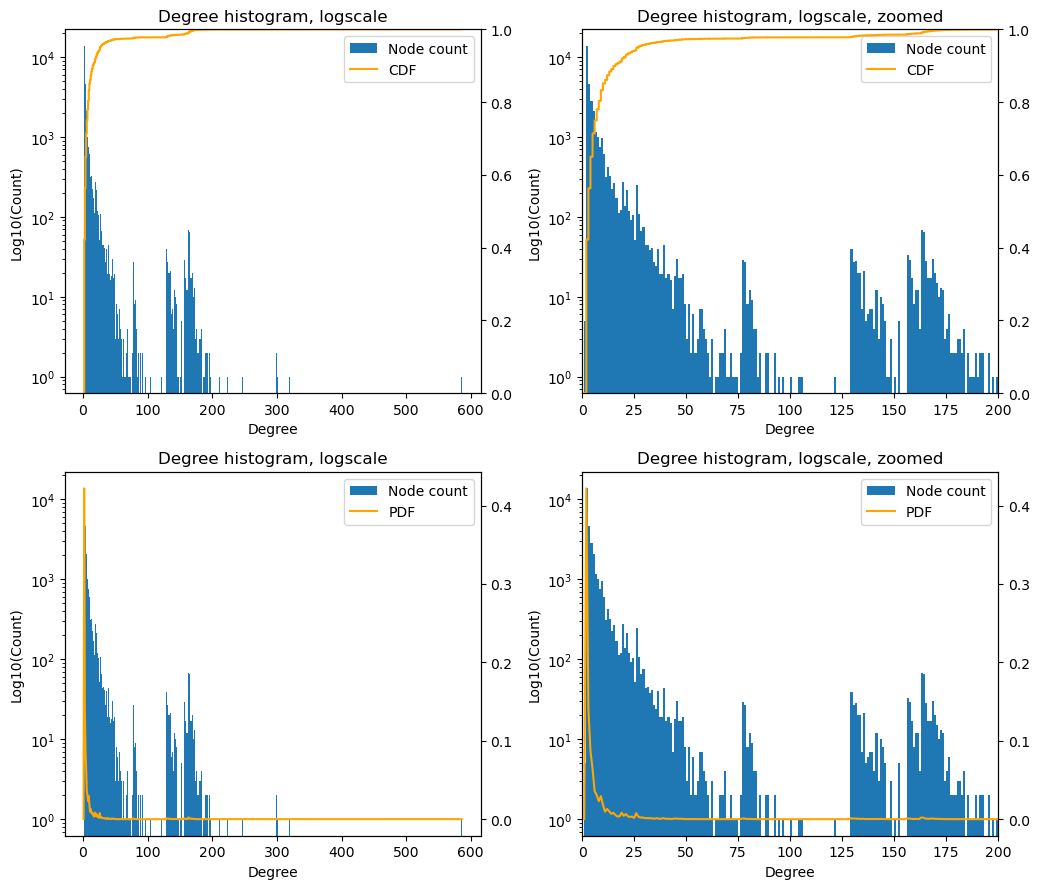

In [11]:
fig2, ax2 = plt.subplots(2,2, figsize=(10.5,9))

ax2[0,0].hist(bins, bins, weights=counts, log=True, label="Node count")
ax3 = ax2[0,0].twinx()
ax3.ecdf(in_degrees, c='orange', label="CDF")
ax2[0,1].hist(bins, bins, weights=counts, log=True, label="Node count")
ax4 = ax2[0,1].twinx()
ax4.ecdf(in_degrees, c='orange', label="CDF")
ax2[0,1].set_xlim(0,200)
ax4.set_xlim(0,200)
ax2[0,0].set_title("Degree histogram, logscale")
ax2[0,1].set_title("Degree histogram, logscale, zoomed")

handles, _ = ax2[0,0].get_legend_handles_labels()
handles += ax3.get_legend_handles_labels()[0]

ax2[0,0].set_ylabel("Log10(Count)")
ax2[0,1].set_ylabel("Log10(Count)")
ax2[0,0].set_xlabel("Degree")
ax2[0,1].set_xlabel("Degree")
ax2[0,0].legend(handles=handles)
ax2[0,1].legend(handles=handles)

arr_counts = np.array(counts)
total_counts = sum(arr_counts)
arr_counts = arr_counts/total_counts

ax2[1,0].hist(bins, bins, weights=counts, log=True, label="Node count")
ax3_2 = ax2[1,0].twinx()
ax3_2.plot(bins, arr_counts, c='orange', label="PDF")
ax2[1,1].hist(bins, bins, weights=counts, log=True, label="Node count")
ax4_2 = ax2[1,1].twinx()
ax4_2.plot(bins, arr_counts, c='orange', label="PDF")
ax2[1,1].set_xlim(0,200)
ax4_2.set_xlim(0,200)
ax2[1,0].set_title("Degree histogram, logscale")
ax2[1,1].set_title("Degree histogram, logscale, zoomed")

handles, _ = ax2[1,0].get_legend_handles_labels()
handles += ax3_2.get_legend_handles_labels()[0]

ax2[1,0].set_ylabel("Log10(Count)")
ax2[1,1].set_ylabel("Log10(Count)")
ax2[1,0].set_xlabel("Degree")
ax2[1,1].set_xlabel("Degree")
ax2[1,0].legend(handles=handles)
ax2[1,1].legend(handles=handles)

plt.tight_layout()
plt.savefig('degree_histogram.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()